# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

##### Business Objective

The main goal of the business is to boost the profits of the dealership by improving the used car inventory. This will be done by finding and stocking cars that match what customers really want, which will result in higher sales prices and quicker turnover of inventory.

##### Assess situation
- **Data Sources:** Kaggle data set will be used which is having 426K records (sampled from a dataset of 3M records). 
- **Permissions:** Kaggle data set are free to use for educational purpose.
- **Risks:** As this is a sample from the original dataset, there might be some outliers or the models may not be acceptable by the dealers. 
- **Costs and Benefits:** Analysis requires computational resources but outweighs the benefits of higher profits through optimized purchasing decisions

##### Data Mining Goals
- Goal is to build a model which can predict the price (or the price range) of the used car based on the customer profile, make, model, mileage or other factors in the dataset. 
- Trained regression models will be used to identify which features are influential in the car's price

##### Project Plan
- Data Interpretation/Understanding
    - Load the data set
    - perform EDA (exploratory data analysis)
    - identify data quality issues (e.g., missing values, outliers)
- Data Preparation/cleaning
    - Remove or impute missing values.
    - Handle outliers.
    - Feature engineering and one-hot encoding to convert columns to numerical format
- build models
    - Split the data into train and test
    - Try different models
    - tune hyperparameters for each model
- evaluate the model
    - Compute the RMSE or MAE errors
    - Identify the best model

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [12]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Display the first 10 rows
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [15]:
"""
# Display the columns in the dataset
"""
print("Columns in Datasets")
display(df.info())

# Percentage of rows missing for each column
print("Percentage of rows missing for each column")
print("-------------------------------------")
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
display(missing_percent)


Columns in Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-nul

None

Percentage of rows missing for each column
-------------------------------------


size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
dtype: float64

In [17]:
# Check for duplicate rows in the dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: ", num_duplicates)

"""
# Display the summary statistics of the dataset
"""
df.describe(include="all").T

Number of duplicates:  0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.224333,4473170.412559,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.033187,12182282.173604,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.235191,9.45212,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.331443,213881.500798,0.0,37704.0,85548.0,133542.5,10000000.0


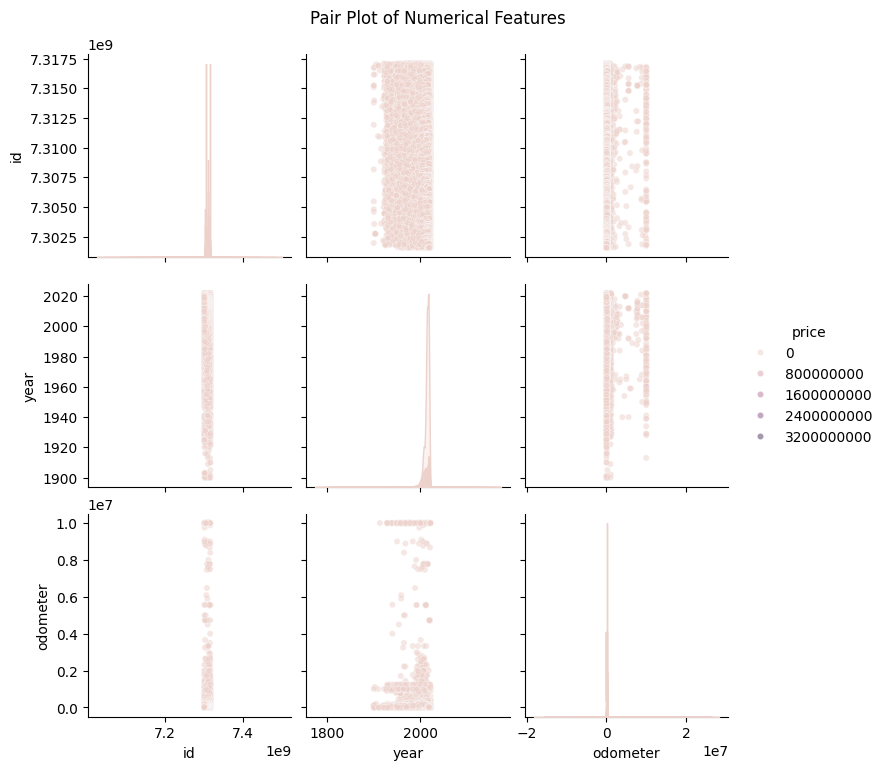

In [19]:
# Select all numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the pair plot
sns.pairplot(numerical_df, hue="price", diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

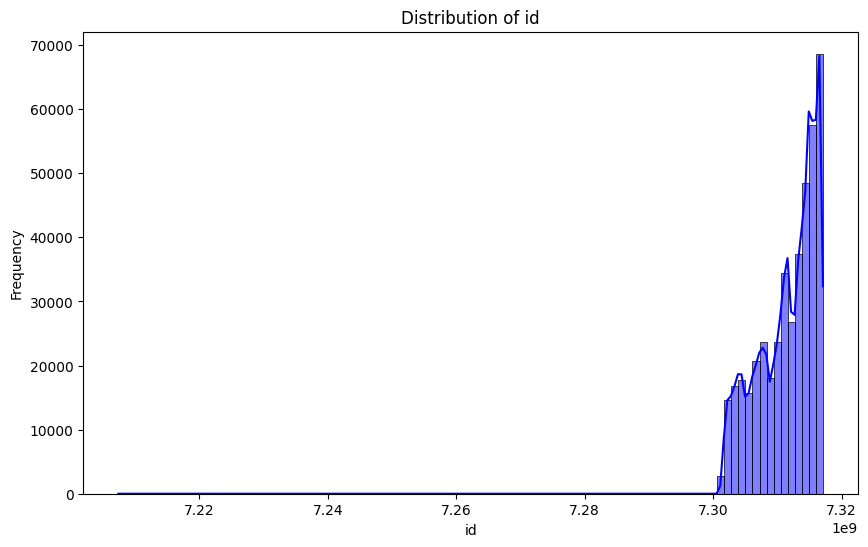

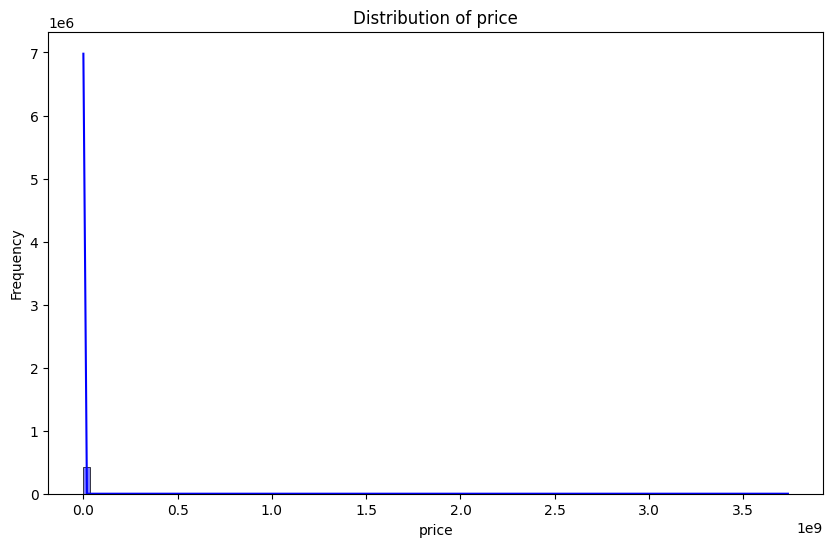

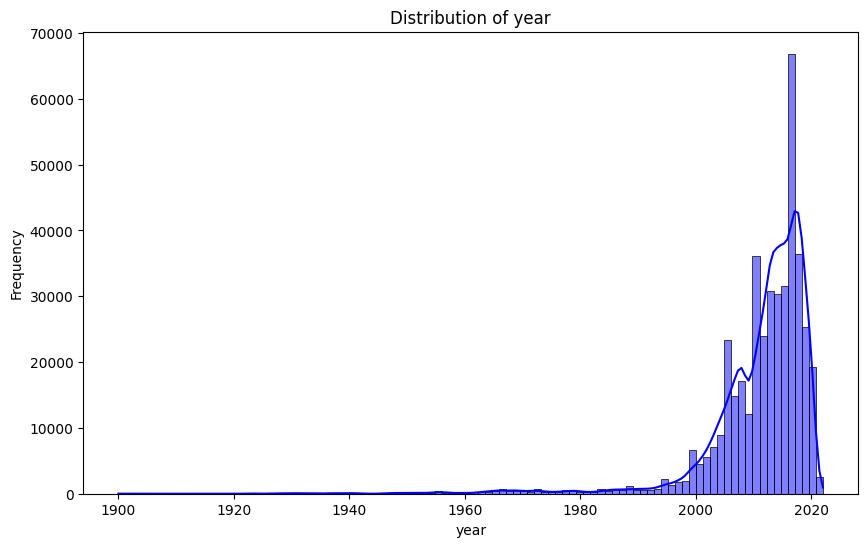

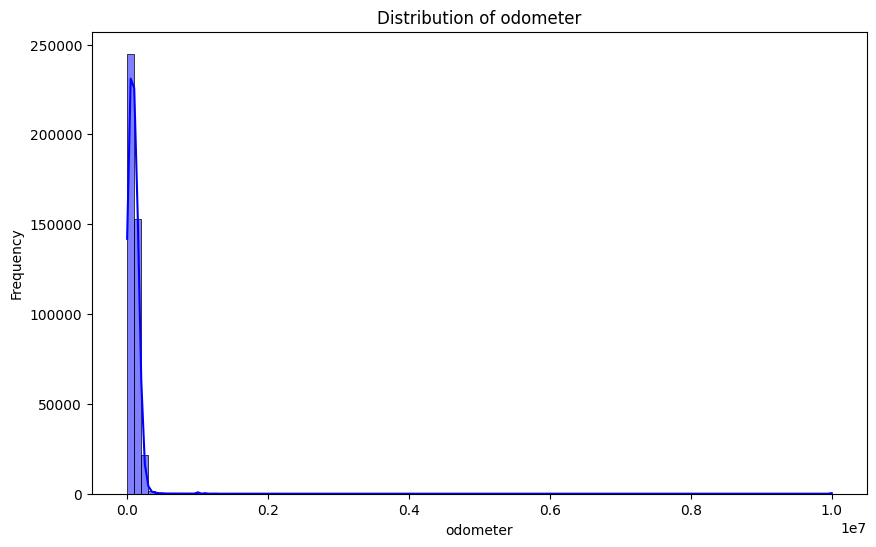

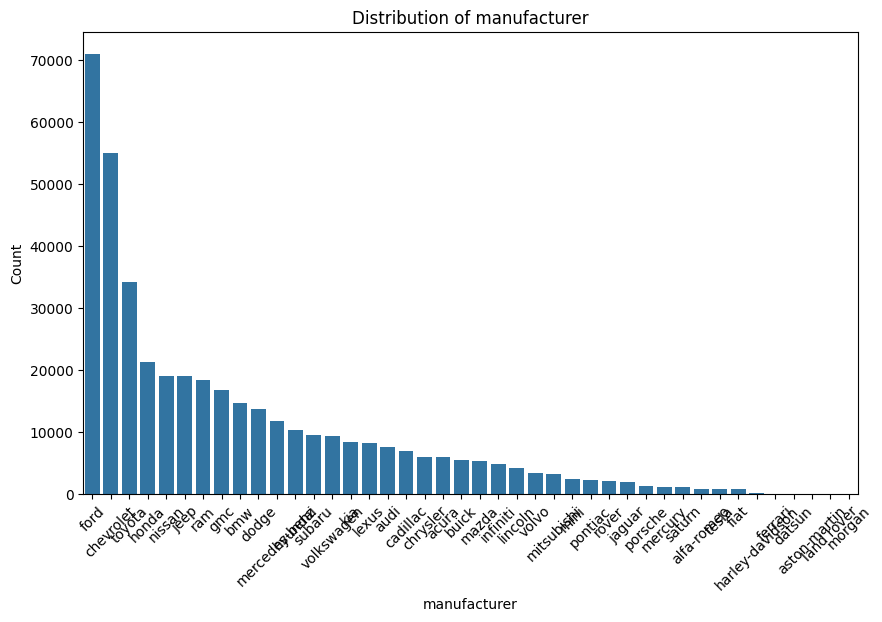

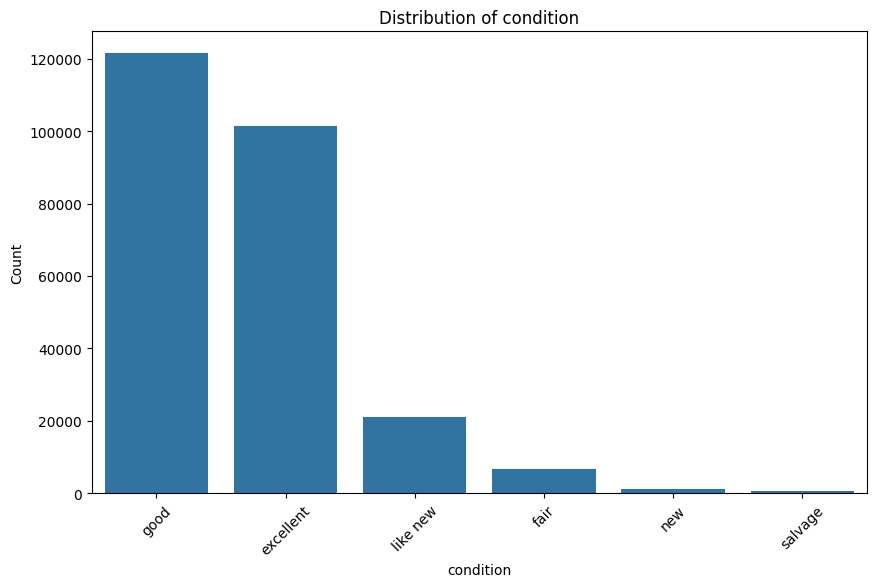

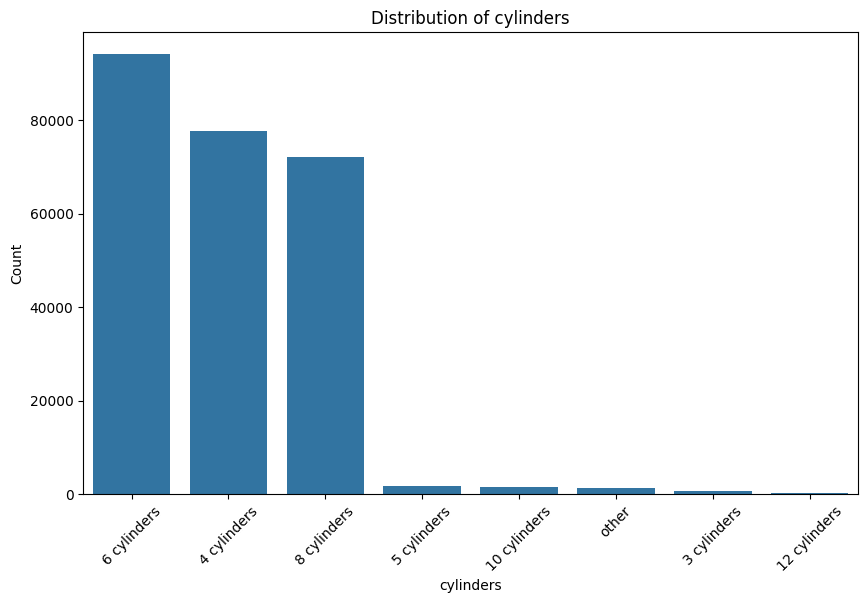

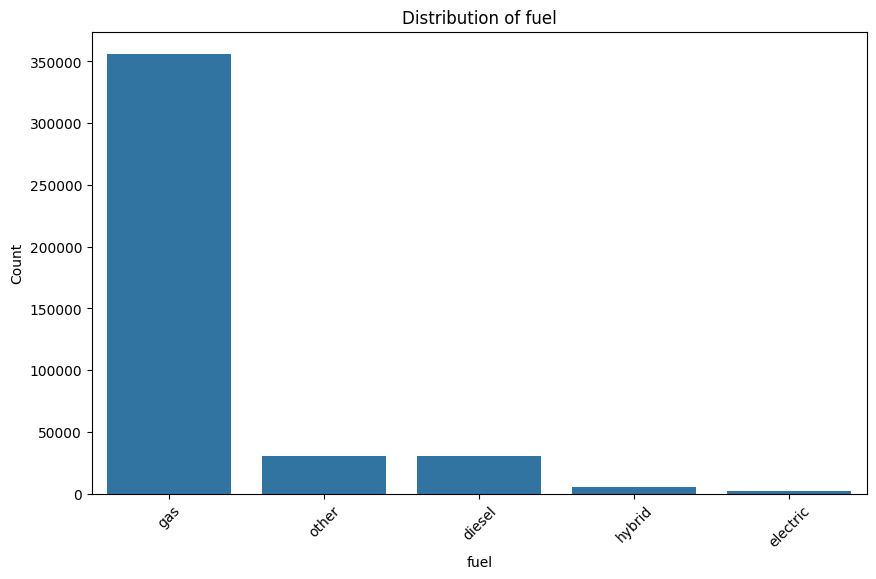

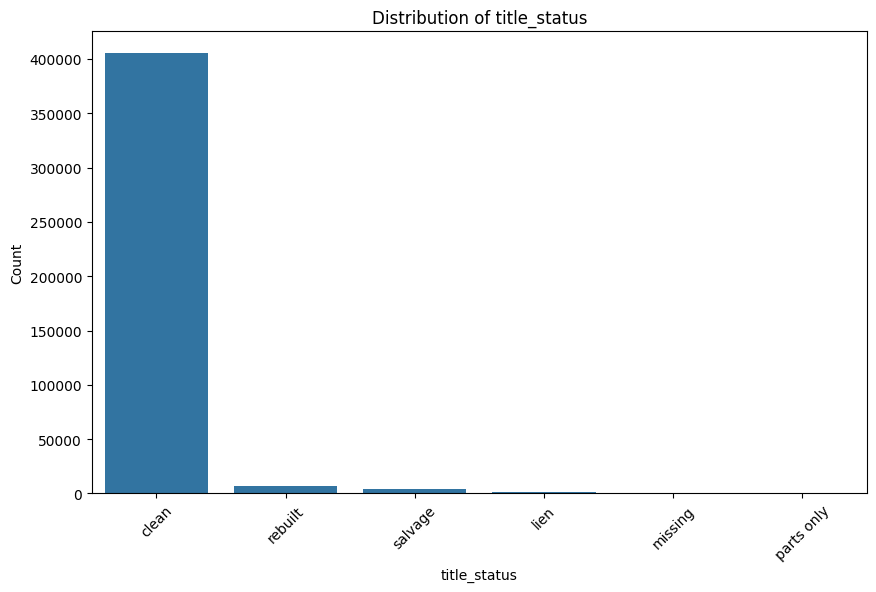

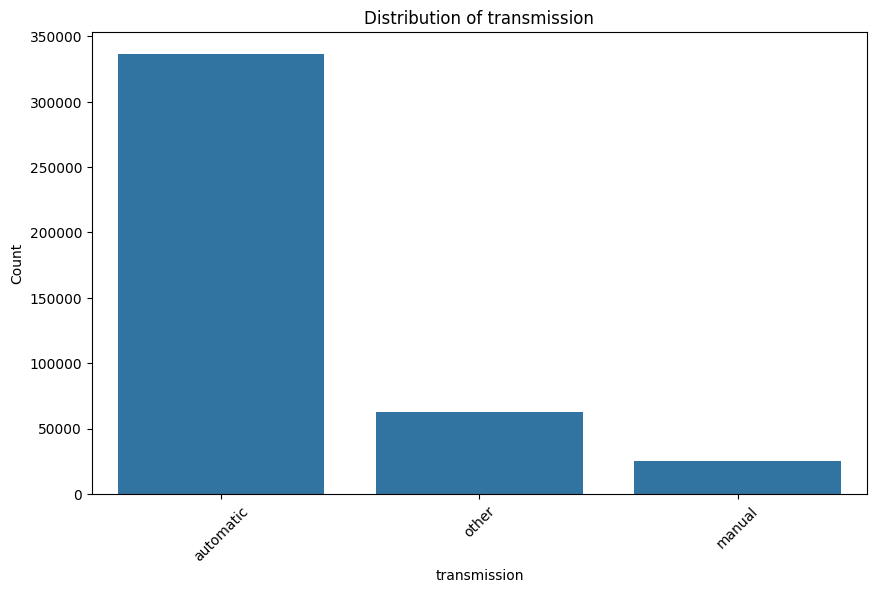

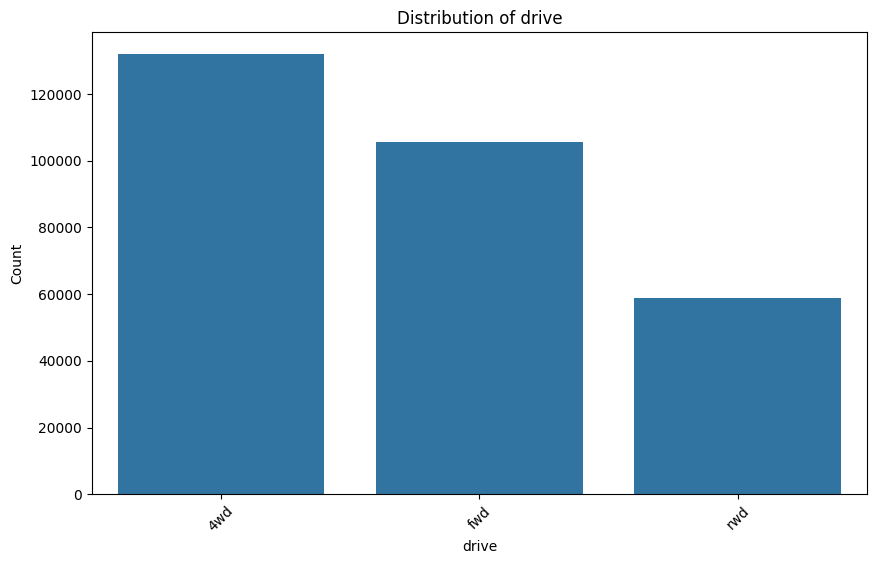

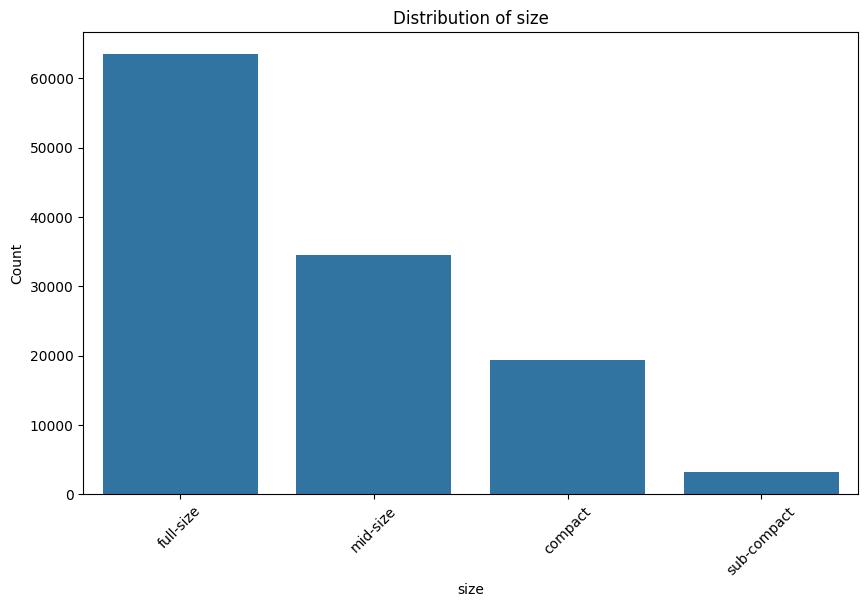

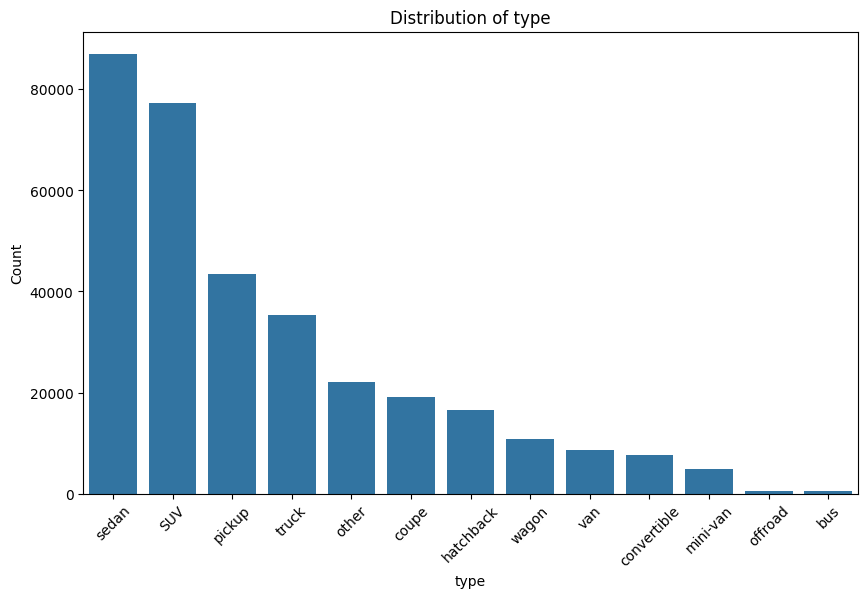

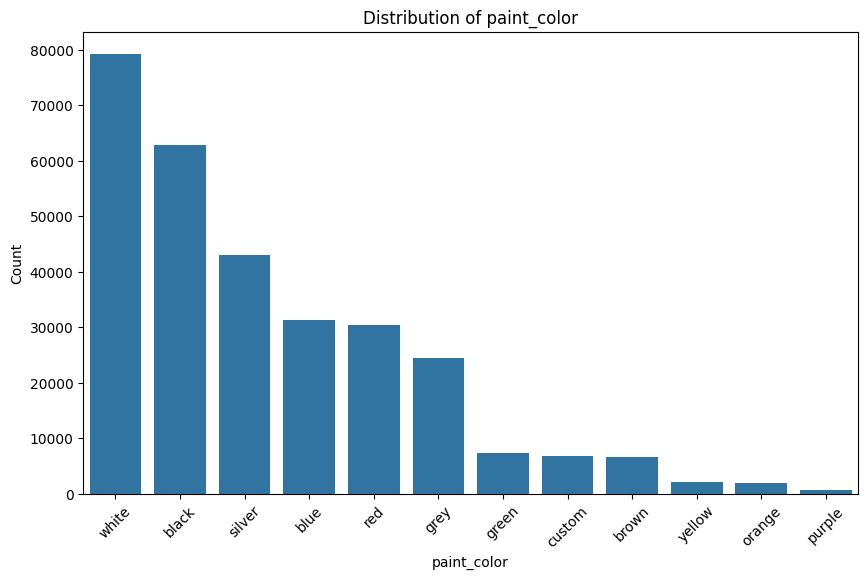

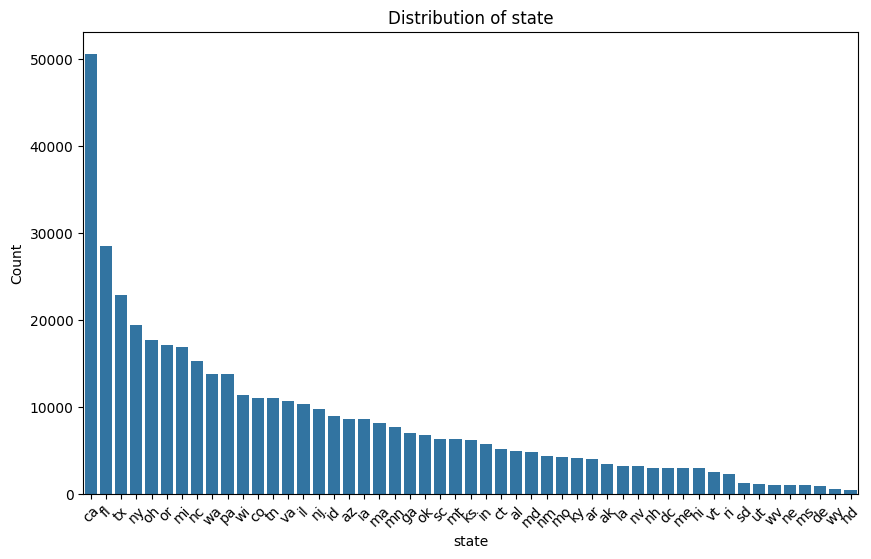

In [24]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns.remove('region')
categorical_columns.remove('model')
categorical_columns.remove('VIN')

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=100, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

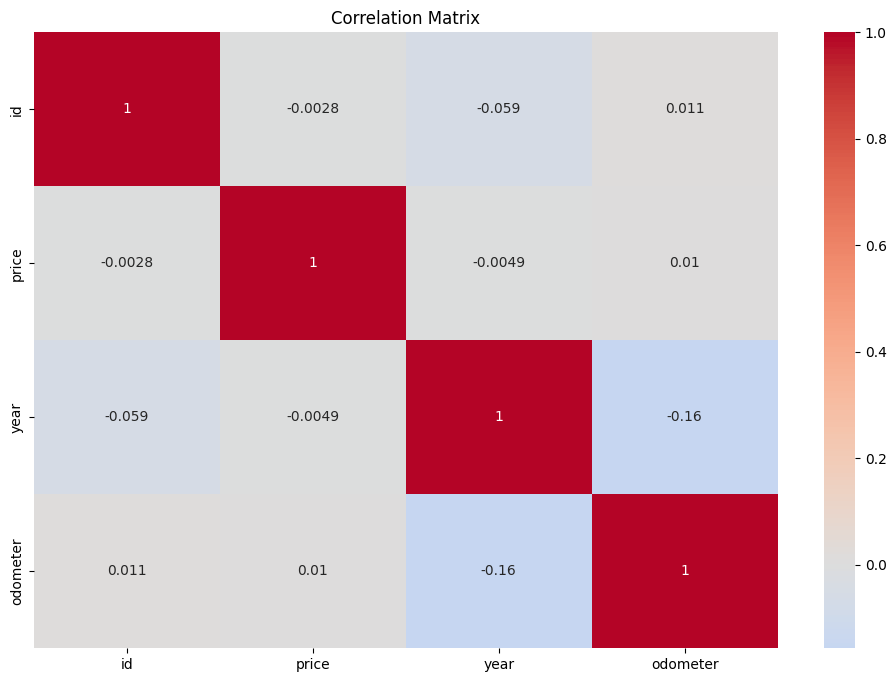

In [26]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

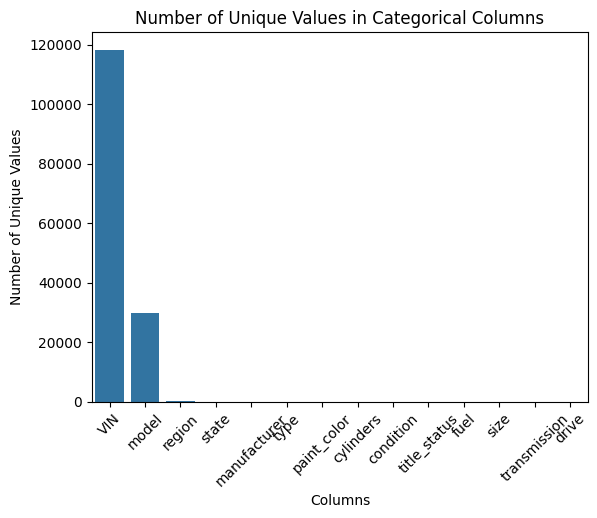

VIN             118246
model            29649
region             404
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
transmission         3
drive                3
dtype: int64

In [28]:
""### How many unique values are there in each categorical column?
unique_counts = df.select_dtypes(exclude=[np.number]).nunique()
unique_counts = unique_counts[unique_counts > 0].sort_values(ascending=False)
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.title('Number of Unique Values in Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()

# Display the counts as a table
display(unique_counts)

In [30]:
import pandas as pd

# Number of rows with at least one missing value
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"Rows with missing values: {rows_with_missing}")

# Number of columns with more than 50% missing values
cols_over_50pct_missing = (df.isnull().mean() > 0.5).sum()
print(f"Columns with >50% missing values: {cols_over_50pct_missing}")

Rows with missing values: 392012
Columns with >50% missing values: 1


Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


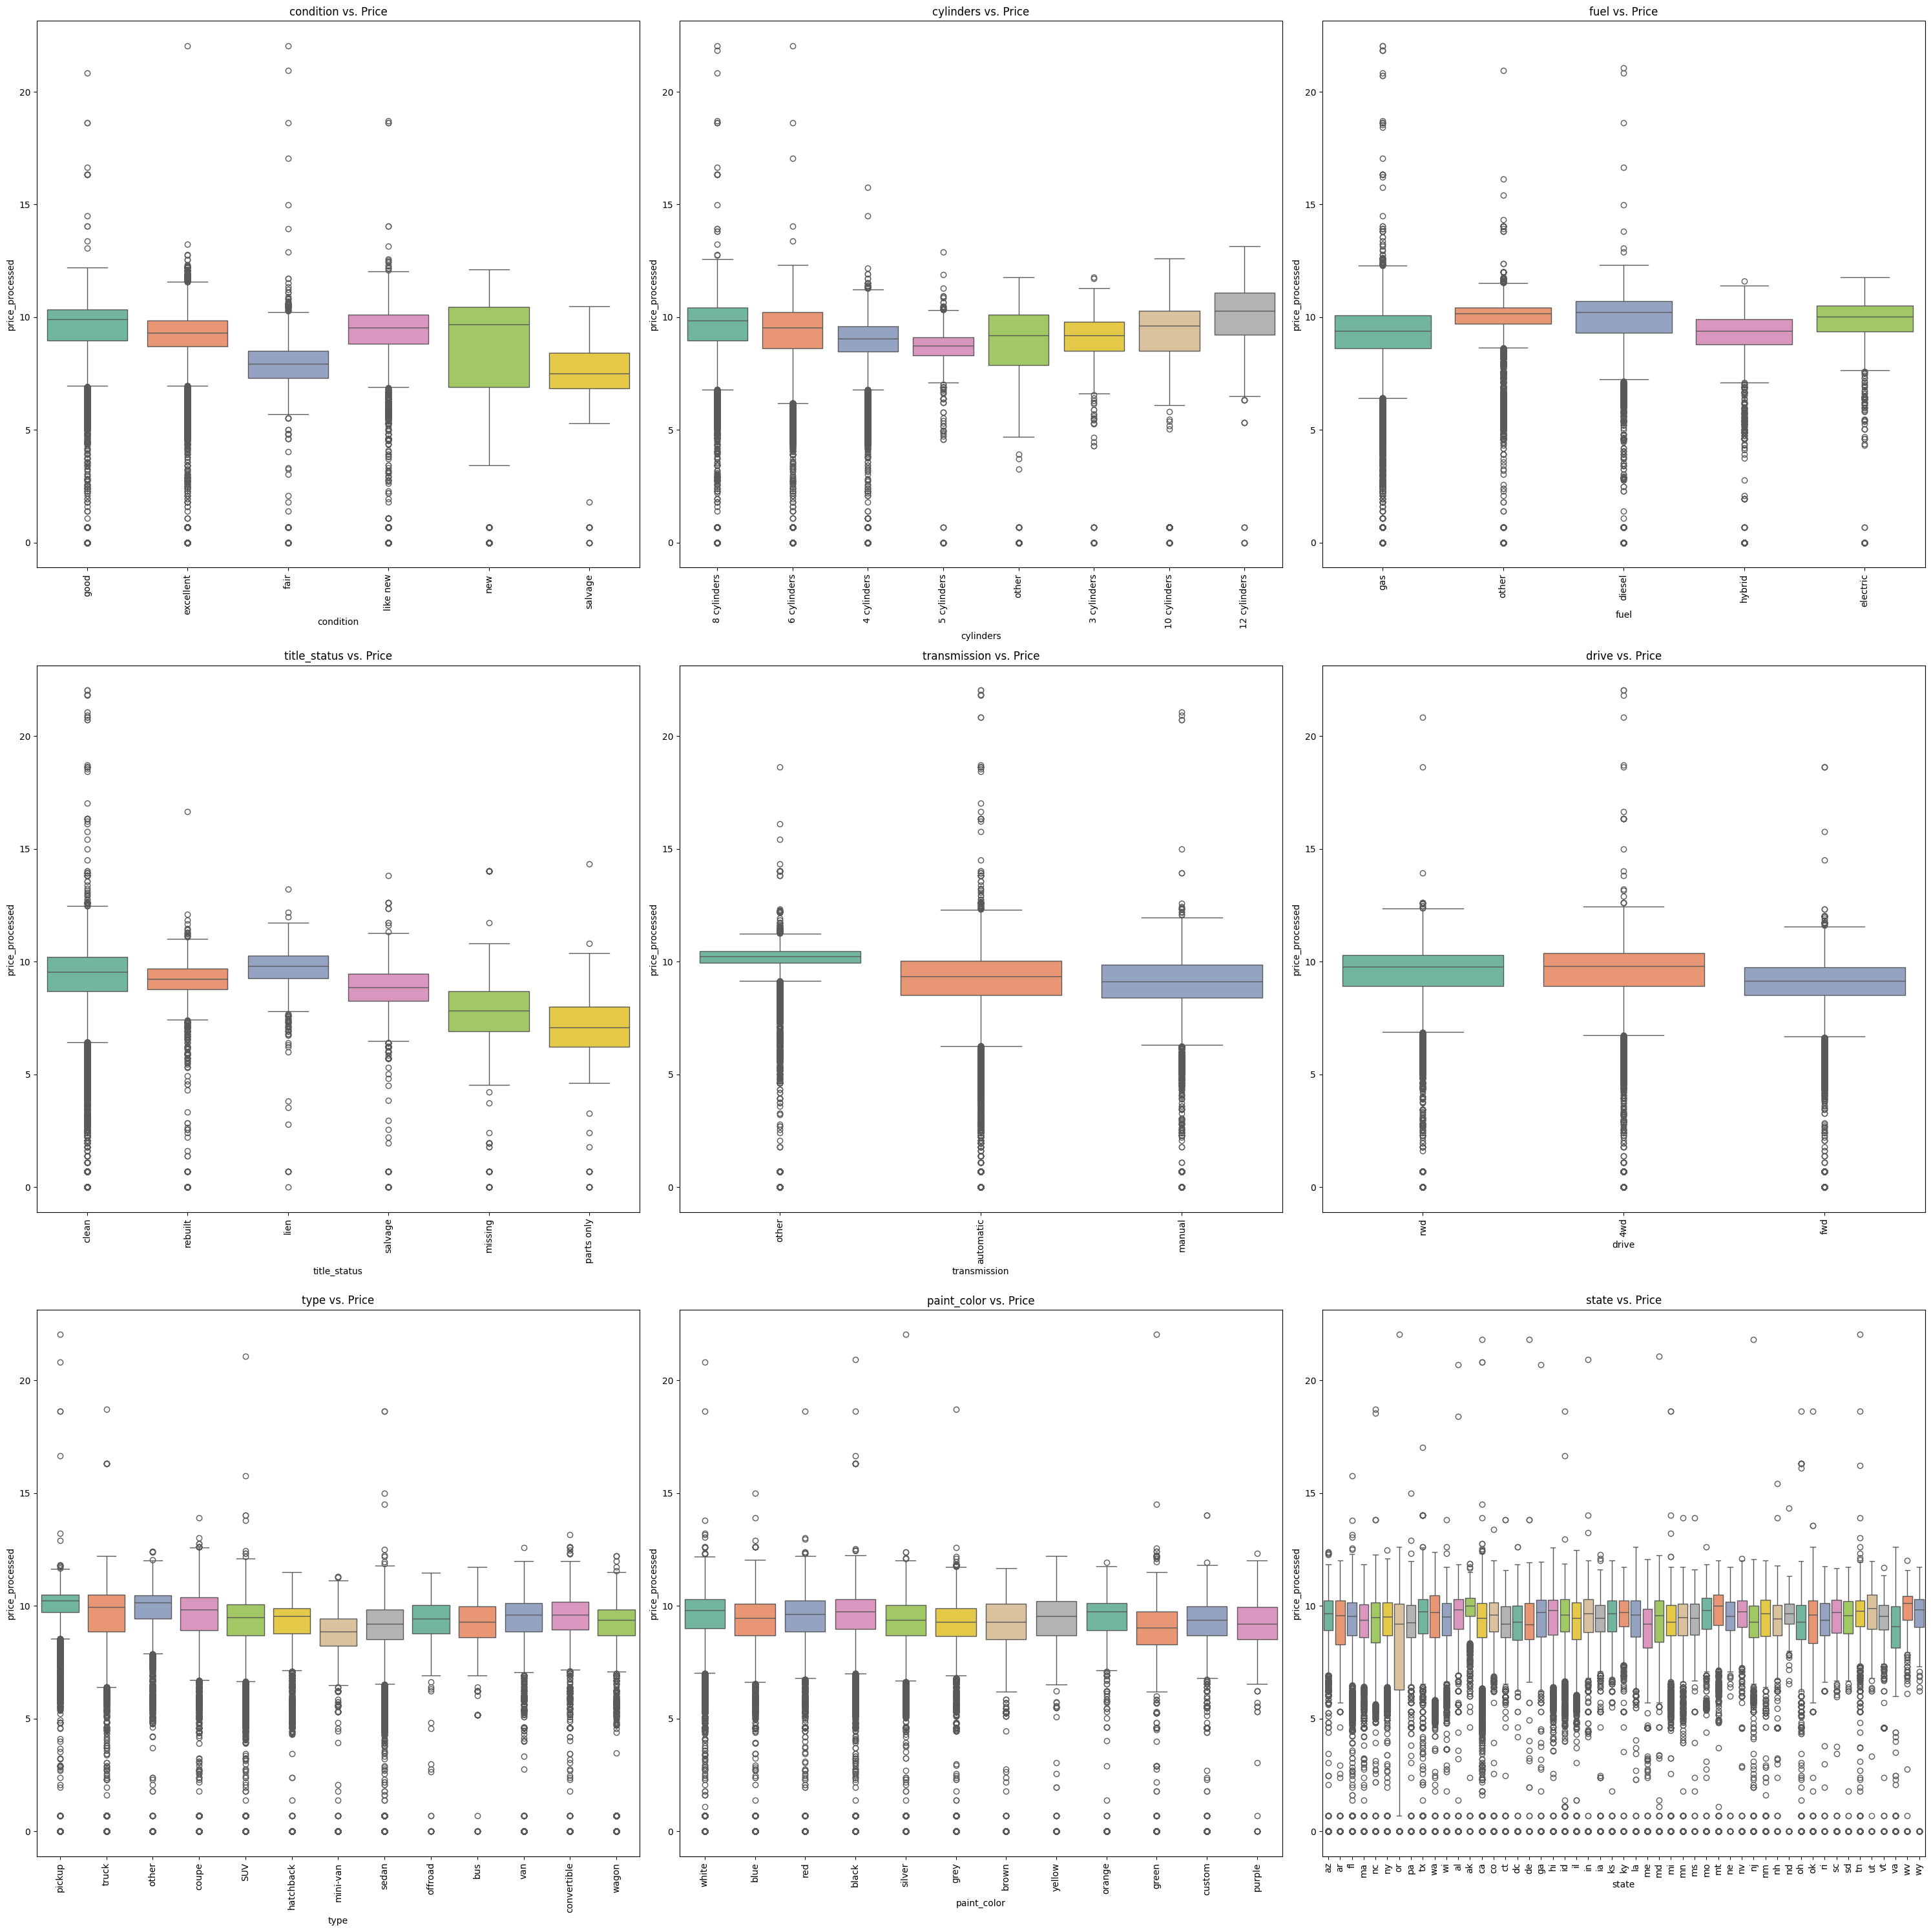

In [32]:
# Categorical Feature vs. Price
# Chaning the data type of 'price' to numeric
print(df.select_dtypes(exclude=['number']).columns)
categorical_columns = ['condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state']
# Example: Remove rows where 'price' is not numeric
df_new = df.copy()
df_new['price_processed'] = np.log1p(df_new['price'])
plt.figure(figsize=(30, 30))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df_new, x=feature, y='price_processed', palette='Set2')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

r#### Summary of Data Understanding
After exploring the dataset, we have identified several key points:
- The dataset contains 426,854 rows and 24 columns.
- There are several numerical columns, including `price`, `odometer`, and `year`, as well as categorical columns such as `make`, `model`, and `color`.
- There are missing values in several columns, including `price`, `odometer`, and `year`.
- The year column shows a range of years from 1981 to 2020, with a concentration of cars from the 2000s and 2010s.
- The make and model columns contain a wide variety of car manufacturers and models, with some being more common than others
- Also observed, there are VINS with duplicates values i.e, same car is listed in multiple regions.
- The price column has a wide range, with some cars priced at $0, indicating missing or invalid data. It also has non-numeric values that need to be cleaned.
- Key Relationships:
    - Price vs. Year: Positive correlation - newer cars tend to be more expensive
    - Price vs. Odometer: Negative correlation - higher mileage cars tend to be cheaper
    - Year vs. Odometer : Negative correlation - older cars tend to have higher mileage
    - Price vs. Make/Model: Some makes/models are consistently more expensive than others
    - Price vs. Condition: Cars in better condition tend to be more expensive
    - Price vs. Fuel Type: Cars with certain fuel types (e.g., electric) tend to be more expensive. Interesting cars with other fuel types, diesel are more expensive than gas, electric, hybrid cars.
    - Price vs. Transmission: Cars with other transmission tend to be more expensive than those with manual transmission and automatic transmission
    - Price vs. Color: Some colors (e.g., black, red, white) tend to be more expensive than others
    - Price vs Title Status: Cars with clean titles tend to be more expensive than those with salvage or rebuilt titles. Interesting to note that cars with lien titles are more expensive.
- Next steps:
    - Handle outliers
    - Address missing values
    - Transform price logarithmically
    - Transform odometer logarithmically
    - Encode categorical variables appropriately

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

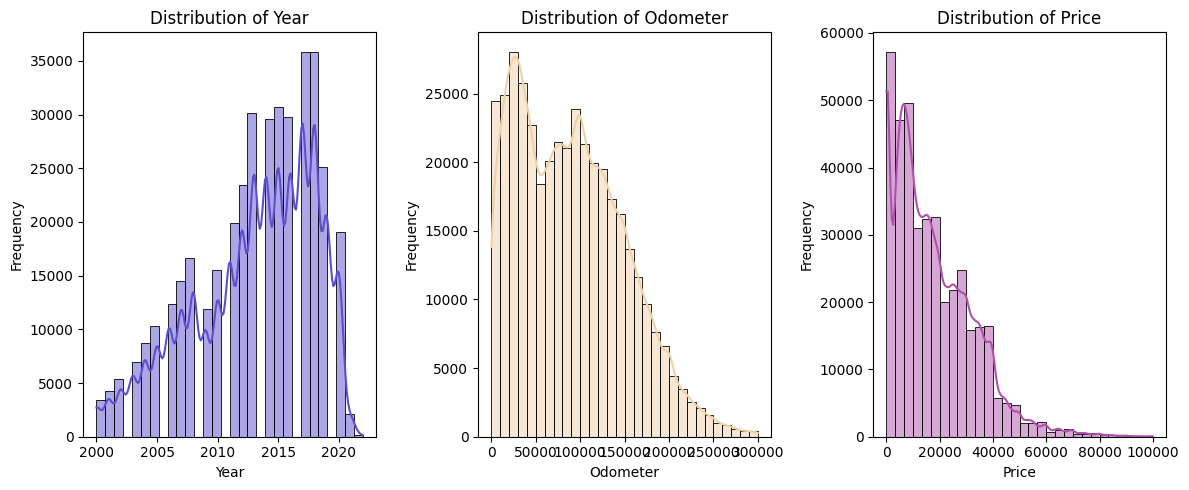

In [37]:
df = pd.read_csv('data/vehicles.csv')

## As the lifespan of the car is the approx 12-20 years, we can remove the cars which are older than 20 years.
## Also remove the car which have odometer reading of more than 300,000 miles.

df = df[(df['year'] >= 2000) & (df['year'] <= 2024) & (df['odometer'] <= 300000)]

# Remove rows with zero values in the price and odometer columns
# Remove prices that are  higher than 100000.
df = df[(df['price'] < 1e5) & (df['odometer'] > 0)]


cols = ['year', 'odometer', 'price']
plt.figure(figsize=(12, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.histplot(df[col], bins=30, kde=True, color=np.random.rand(3,))
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [38]:
from sklearn.impute import SimpleImputer

# Identify missing values
missing_percent = df.isnull().mean() * 100
print("Missing values percentage:\n", missing_percent)

# Drop columns with >50% missing values
df = df.loc[:, missing_percent <= 50]

# Impute numerical columns with the median and categorical columns with the mode

num_imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=[float, int]).columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

df.head().T

Missing values percentage:
 id               0.000000
region           0.000000
price            0.000000
year             0.000000
manufacturer     3.014602
model            0.880057
condition       41.162553
cylinders       42.131176
fuel             0.529616
odometer         0.000000
title_status     1.786147
transmission     0.417057
VIN             34.863053
drive           30.215445
size            72.474240
type            20.669588
paint_color     30.063069
state            0.000000
dtype: float64


,27,28,29,30,31
id,7316814884.0,7316814758.0,7316814989.0,7316743432.0,7316356412.0
region,auburn,auburn,auburn,auburn,auburn
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,2014.0,2010.0,2020.0,2017.0,2013.0
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0


In [41]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

df_no_outliers = df.copy()
# Replace missing values with np.nan
df_no_outliers.loc[:, 'condition'] = df_no_outliers['condition'].replace('NaN', np.nan)
df_no_outliers.loc[:, 'title_status'] = df_no_outliers['title_status'].replace('NaN', np.nan)

condition_order = ['new', 'excellent', 'like new', 'good', 'fair', 'salvage']
condition_order.reverse()
title_status_order = ['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only']
title_status_order.reverse()

encoder = OrdinalEncoder(
    categories=[condition_order, title_status_order],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

cols_to_encode = ['condition', 'title_status']
df_no_outliers.loc[:, ['condition_encoded', 'title_status_encoded']] = encoder.fit_transform(df_no_outliers[cols_to_encode])


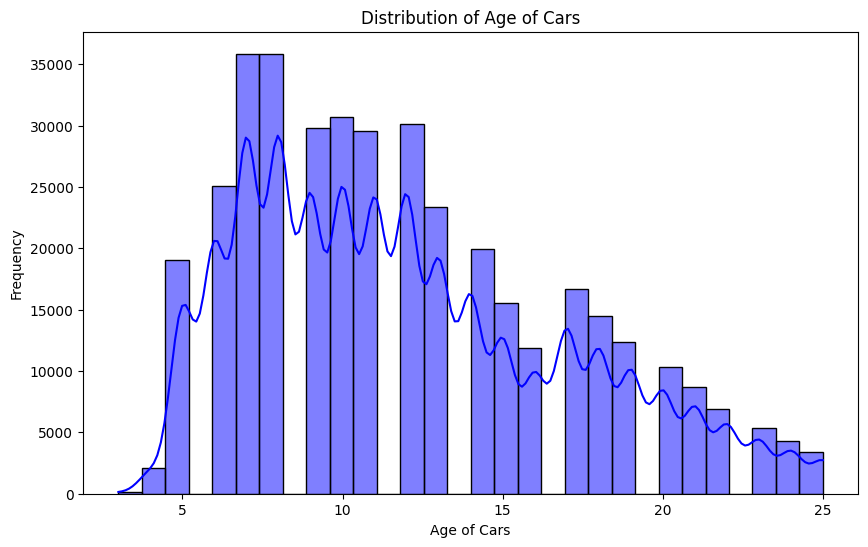

<Axes: xlabel='age', ylabel='price'>

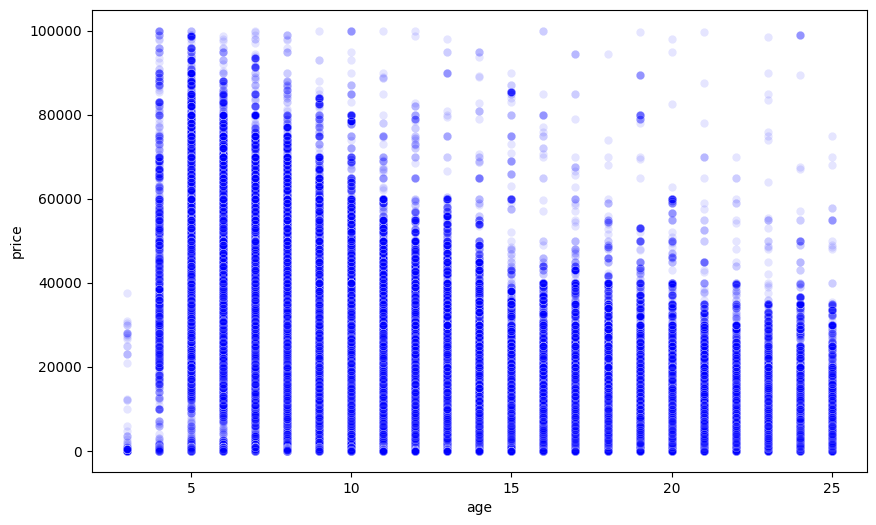

In [43]:
from datetime import datetime
current_year = datetime.now().year

# 1. Create 'age' variable
df_no_outliers.loc[:, 'age'] = current_year - df_no_outliers['year']

"""
# Distribution of 'age' variable and its relationship with 'log_price'
"""

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age of Cars')
plt.xlabel('Age of Cars')
plt.ylabel('Frequency')
plt.show()

"Its correlation with log_price"
plt.figure(figsize=(10, 6))
# Scatter plot of price vs age
sns.scatterplot(data=df_no_outliers, x='age', y='price', color='blue', alpha=0.1)


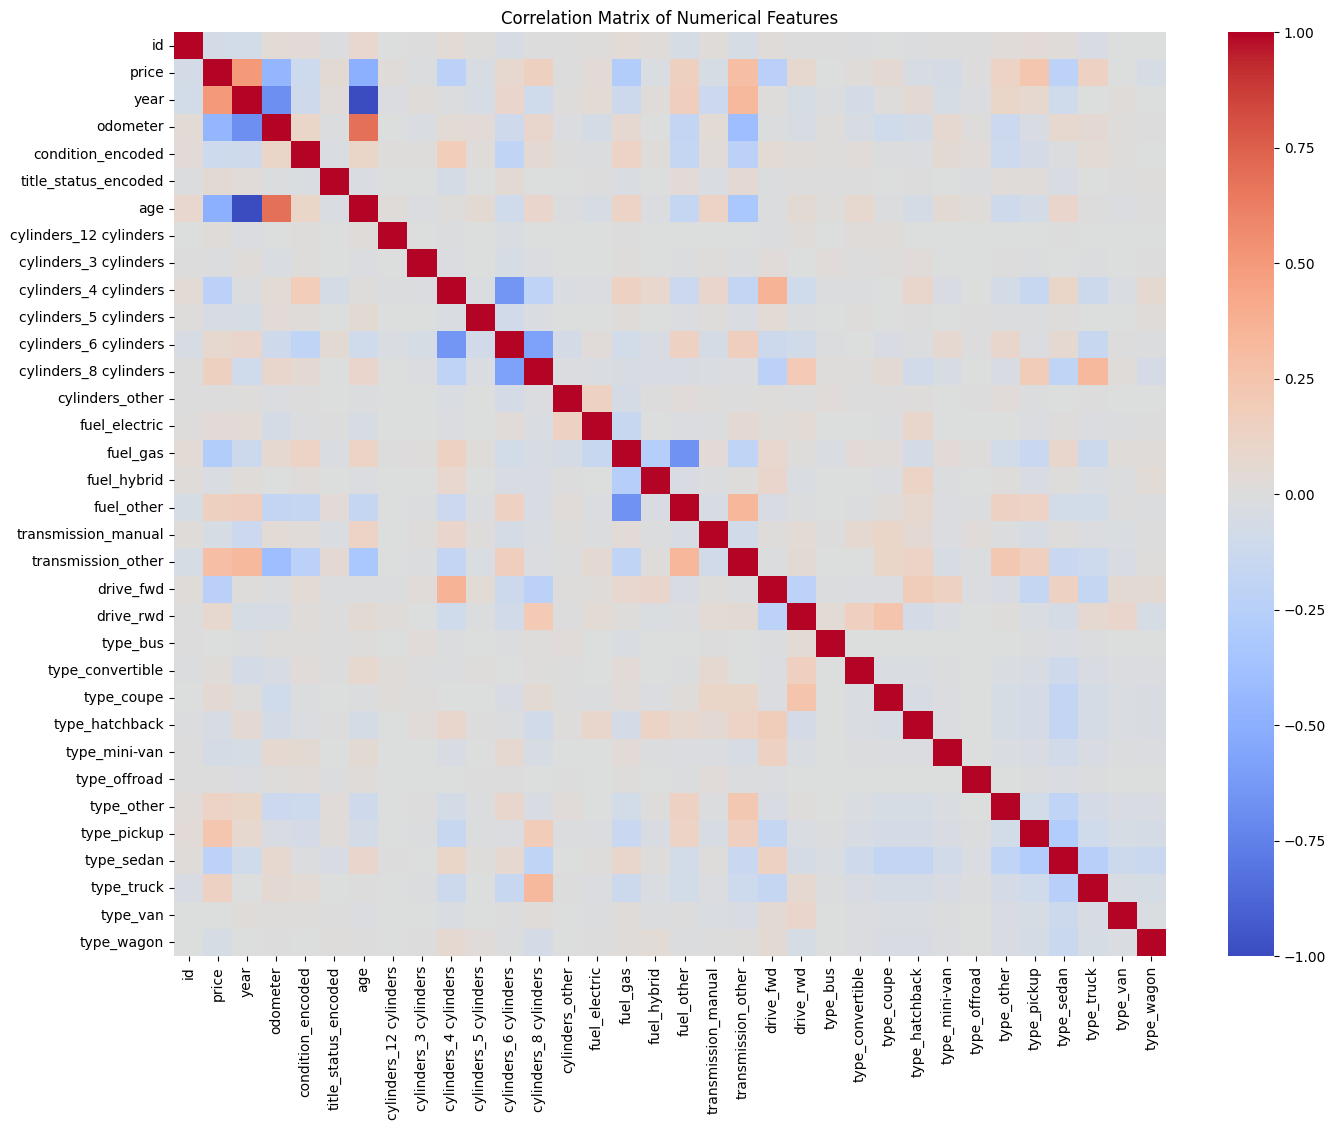

In [45]:
# One-hot encode the categorical columns

categorical_columns= ['cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state', 'manufacturer']
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns, drop_first=True)
df_encoded.head().T
numerical_cols = df_encoded.select_dtypes(include=[np.number, 'bool']).columns.tolist()
for col in df_encoded.columns:
    if col.startswith('state_') or col.startswith('manufacturer_') or col.startswith('paint_color_'):
        numerical_cols.remove(col)

vehicles_df = df_encoded[numerical_cols]

correlation_matrix = vehicles_df.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


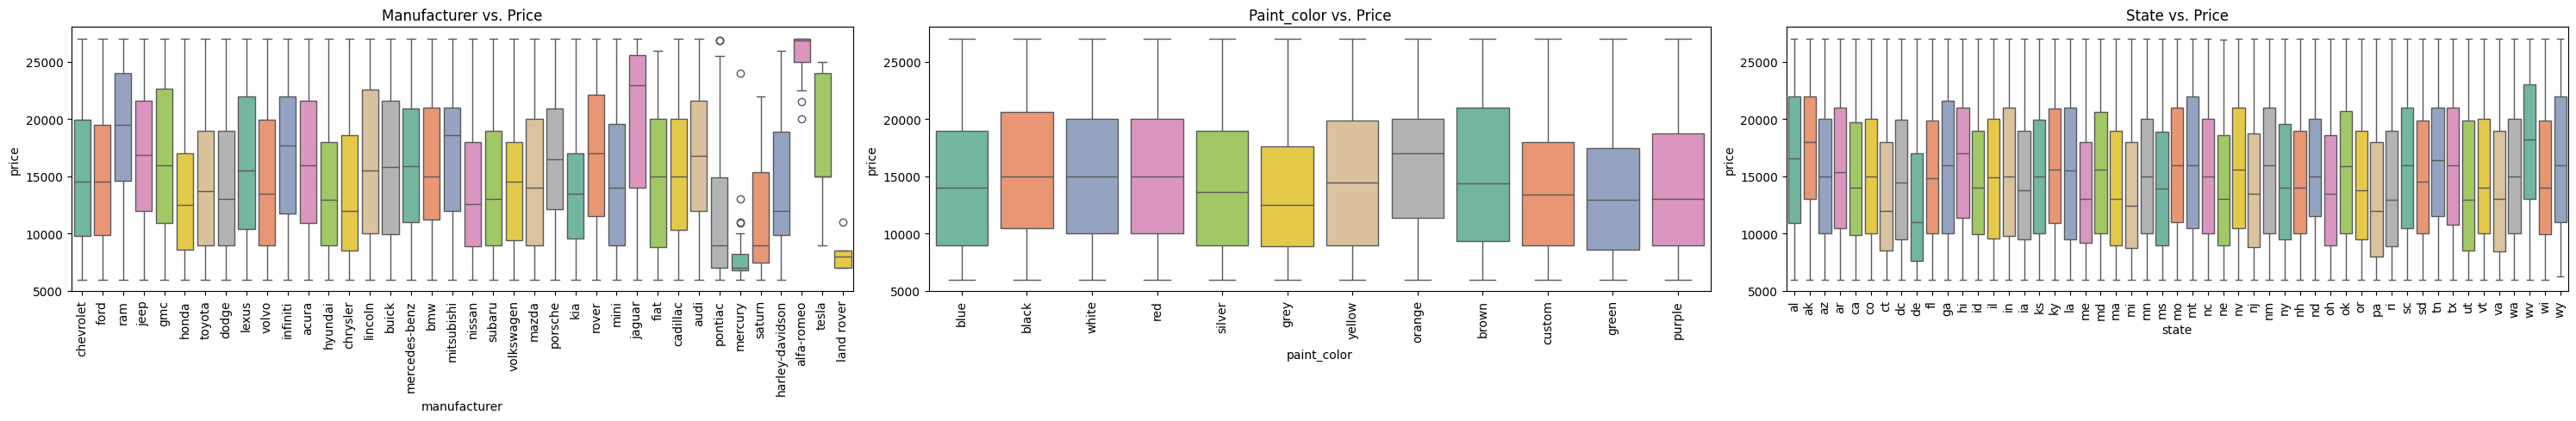

In [47]:
# box plot of price vs manufacturer or paint_color or state
# remove outliers from the price column using IQR method
# Calculate Q1 and Q3
Q1 = df_no_outliers['price'].quantile(0.25)
Q3 = df_no_outliers['price'].quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1
upper_bound = Q3
# Filter out outliers
dfprocessed = df_no_outliers[(df_no_outliers['price'] >= lower_bound) & (df_no_outliers['price'] <= upper_bound)]

plt.figure(figsize=(30, 5))
for i, col in enumerate(['manufacturer', 'paint_color', 'state'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=dfprocessed, x=col, y='price', palette='Set2')
    plt.title(f'{col.capitalize()} vs. Price')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


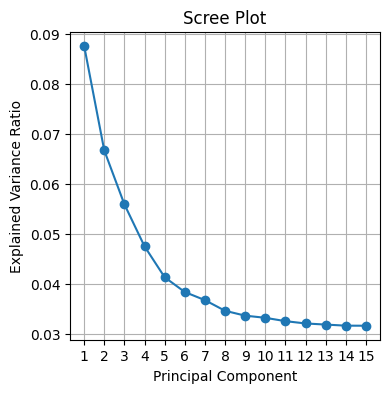

[0.08766193 0.06675977 0.05597646 0.04758671 0.0414063  0.03845197
 0.03683113 0.03470324 0.03372721 0.03329908 0.03262861 0.03216889
 0.03194658 0.03172909 0.03171628]


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_cols = vehicles_df.select_dtypes(include=[np.number, 'bool']).columns.tolist()
feature_cols.remove('price')  # Remove target variable from features
feature_cols.remove('year')
X = vehicles_df[feature_cols]
y = vehicles_df['price']

# SPlit the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data points through feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on your scaled data
pca = PCA(n_components=15)  # Reduce to top 15 components
pca.fit(X_train_scaled)

# Scree plot
plt.figure(figsize=(4, 4))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# To get the explained variance ratio for these 10 components:
print(pca.explained_variance_ratio_)



In [51]:
from sklearn.decomposition import PCA

# Refit PCA with 7 components
pca = PCA(n_components=7)
pca.fit(X_train_scaled)

# Transform the scaled data using the new PCA
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [53]:
# Identify the top featuures
n_components = 7
feature_names = X_train.columns

for i in range(n_components):
    component = pca.components_[i]
    top_indices = np.argsort(np.abs(component))[::-1][:7]  # Top 5 features
    print(f"PC{i+1} top features:")
    for idx in top_indices:
        print(f"  {feature_names[idx]}: {component[idx]:.3f}")
    print()

PC1 top features:
  transmission_other: 0.405
  fuel_other: 0.372
  odometer: -0.348
  age: -0.340
  fuel_gas: -0.319
  cylinders_6 cylinders: 0.285
  cylinders_4 cylinders: -0.277

PC2 top features:
  cylinders_8 cylinders: 0.537
  drive_fwd: -0.392
  type_truck: 0.355
  type_sedan: -0.308
  drive_rwd: 0.294
  cylinders_4 cylinders: -0.230
  cylinders_6 cylinders: -0.223

PC3 top features:
  cylinders_6 cylinders: 0.547
  cylinders_4 cylinders: -0.480
  drive_fwd: -0.263
  type_hatchback: -0.255
  age: 0.254
  odometer: 0.252
  type_sedan: 0.196

PC4 top features:
  fuel_gas: 0.519
  odometer: -0.390
  fuel_other: -0.337
  type_coupe: 0.316
  age: -0.293
  drive_rwd: 0.288
  fuel_hybrid: -0.286

PC5 top features:
  drive_rwd: 0.424
  type_coupe: 0.402
  transmission_manual: 0.391
  type_convertible: 0.302
  age: 0.296
  type_pickup: -0.239
  type_truck: -0.194

PC6 top features:
  type_sedan: 0.598
  type_mini-van: -0.409
  type_wagon: -0.313
  type_hatchback: -0.245
  fuel_electric: 

#### Findings from Data Preparation
- The dataset was cleaned by removing columns with more than 50% missing values are dropped.
- The numerical columns which has missing values were imputed with the median and categorical columns with the mode.
- Rows with zero values in the `price` and `odometer` columns were removed to ensure that only valid data points are used for modeling.
- Prices that were higher than $100,000 were removed to eliminate potential outliers.
- Cars older than 20 years and those with odometer readings greater than 300,000 miles were removed to focus on more relevant data.
- The `condition` and `title_status` columns were encoded using ordinal encoding, with a predefined order for the categories.
- One-hot encoding was applied to categorical variables such as `manufacturer`, `cylinders`, `fuel`, `transmission`, `drive`, `type`, `paint_color`, and `state` to convert them into numerical format suitable for modeling.
- A new feature `age` was created to represent the age of the car, calculated as the difference between the current year and the car's year.
- The dataset was standardized using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.
- Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset, retaining the top 6 principal components that explain a significant portion of the variance in the data.
- The final dataset is now ready for regression modeling, with the target variable being the `price` and the features being the processed numerical and categorical variables.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [57]:
## Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Transform the scaled data using the fitted PCA
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

# Predict on test set
y_pred = lr.predict(X_test_pca)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE for Linear Regression:", rmse)
print("MAE for Linear Regression:", mae)

RMSE for Linear Regression: 11676.634071466442
MAE for Linear Regression: 8024.697909020499


In [59]:
# Lasso Regression with different alphas
alphas = [0.01, 0.1, 1, 10]
lasso_results = {}
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=112, max_iter=10000)
    lasso.fit(X_train_pca, y_train)
    y_pred = lasso.predict(X_test_pca)
    lasso_results[alpha] = {
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred)
    }
# Display results
lasso_results_df = pd.DataFrame(lasso_results).T
lasso_results_df.index.name = 'alpha'
lasso_results_df = lasso_results_df.reset_index()
lasso_results_df.columns = ['alpha', 'RMSE', 'MAE']
print("Lasso Regression Results:")
display(lasso_results_df)


Lasso Regression Results:


,alpha,RMSE,MAE
0,0.01,11676.633868,8024.698263
1,0.10,11676.632040,8024.701451
2,1.00,11676.613932,8024.733477
3,10.00,11676.449828,8025.068536


In [61]:
# Lasso Regression with different alphas
alphas = [0.01, 0.1, 1, 10, 1e-5]
lasso_results = {}
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=112, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    lasso_results[alpha] = {
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred)
    }
# Display results
lasso_results_df = pd.DataFrame(lasso_results).T
lasso_results_df.index.name = 'alpha'
lasso_results_df = lasso_results_df.reset_index()
lasso_results_df.columns = ['alpha', 'RMSE', 'MAE']
print("Lasso Regression Results:")
display(lasso_results_df)


Lasso Regression Results:


,alpha,RMSE,MAE
0,0.01000,10878.387956,7325.628711
1,0.10000,10878.381165,7325.634294
2,1.00000,10878.320436,7325.691391
3,10.00000,10878.377945,7326.576611
4,0.00001,10878.388717,7325.628091


In [62]:
# PCA + Ridge Regression with different alphas
ridge_results = {}
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42, )
    ridge.fit(X_train_pca, y_train)
    y_pred = ridge.predict(X_test_pca)
    ridge_results[alpha] = {
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred)
    }
# Display results
ridge_results_df = pd.DataFrame(ridge_results).T
ridge_results_df.index.name = 'alpha'
ridge_results_df = ridge_results_df.reset_index()
ridge_results_df.columns = ['alpha', 'RMSE', 'MAE']
print("Ridge Regression Results:")
display(ridge_results_df)


Ridge Regression Results:


,alpha,RMSE,MAE
0,0.01000,11676.634070,8024.697909
1,0.10000,11676.634060,8024.697907
2,1.00000,11676.633955,8024.697894
3,10.00000,11676.632906,8024.697757
4,0.00001,11676.634071,8024.697909


In [67]:
# Ridge Regression with different alphas
ridge_results = {}
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42, )
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    ridge_results[alpha] = {
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred)
    }
# Display results
ridge_results_df = pd.DataFrame(ridge_results).T
ridge_results_df.index.name = 'alpha'
ridge_results_df = ridge_results_df.reset_index()
ridge_results_df.columns = ['alpha', 'RMSE', 'MAE']
print("Ridge Regression Results:")
display(ridge_results_df)

Ridge Regression Results:


,alpha,RMSE,MAE
0,0.01000,10878.388712,7325.628097
1,0.10000,10878.388661,7325.628154
2,1.00000,10878.388149,7325.628723
3,10.00000,10878.383076,7325.634384
4,0.00001,10878.388718,7325.628091


In [69]:

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Pipeline with scaling + RidgeCV
model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.logspace(-5, 5, 100), cv=5)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Access the best alpha
best_alpha = model.named_steps['ridgecv'].alpha_
print("Best alpha from CV:", best_alpha)

Best alpha from CV: 148.49682622544634


#### Observations

The linear models performed almost similar to one another. Also, the effect of alpha is limited on the RMSE and MAE with slight variations.


Training and evaluating models...
Training Linear...
Training Ridge...
Training Lasso...
Training PCA + Ridge...
Training PCA + Lasso...
Training Poly + Ridge...


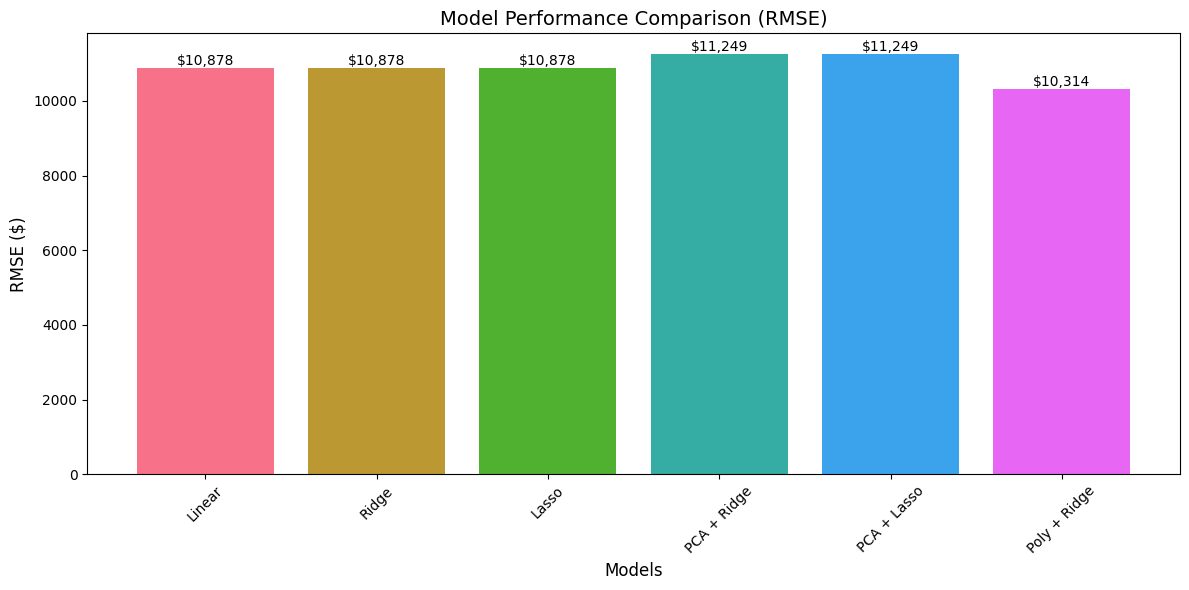

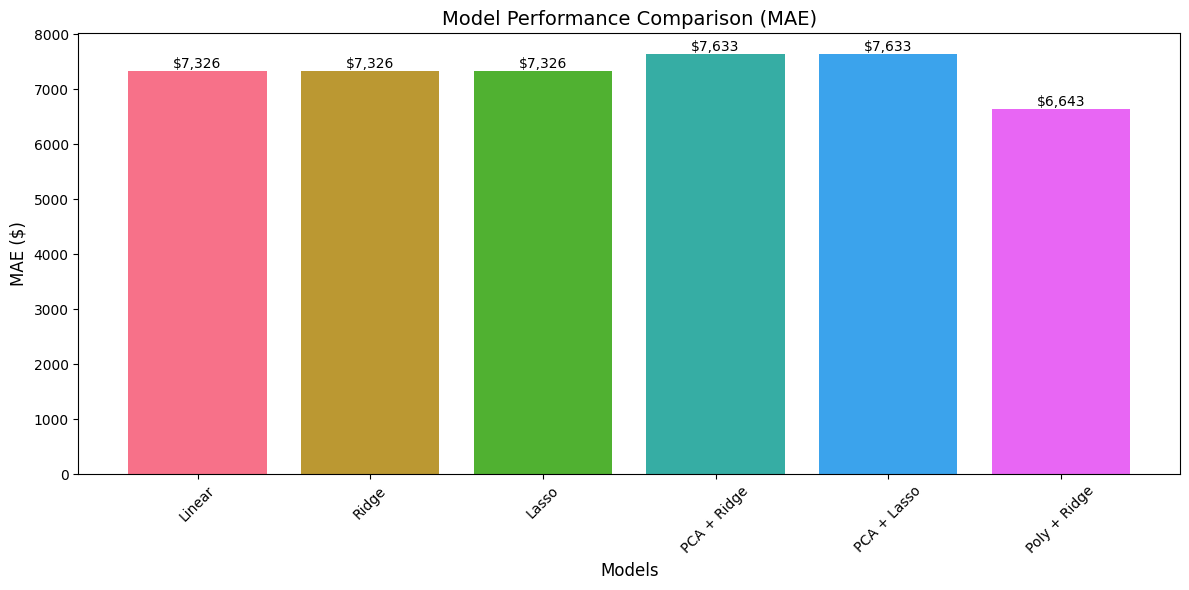

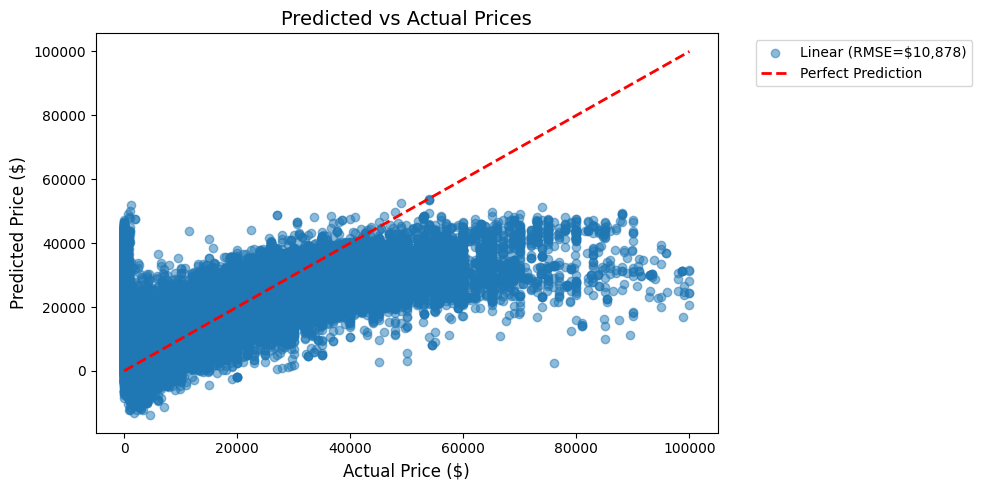

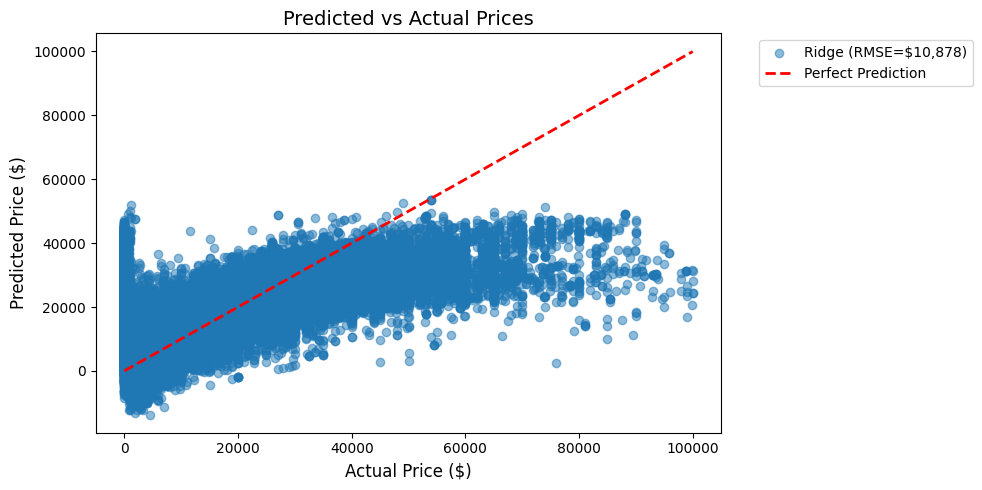

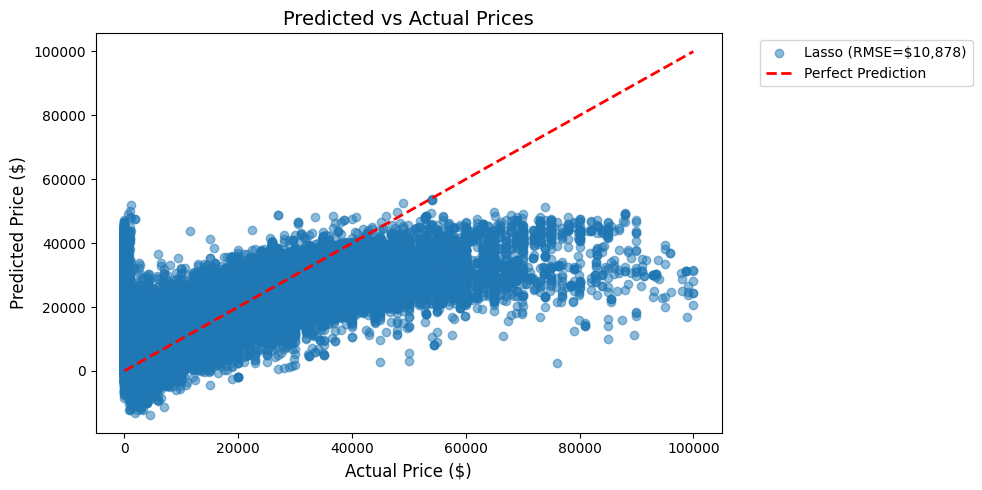

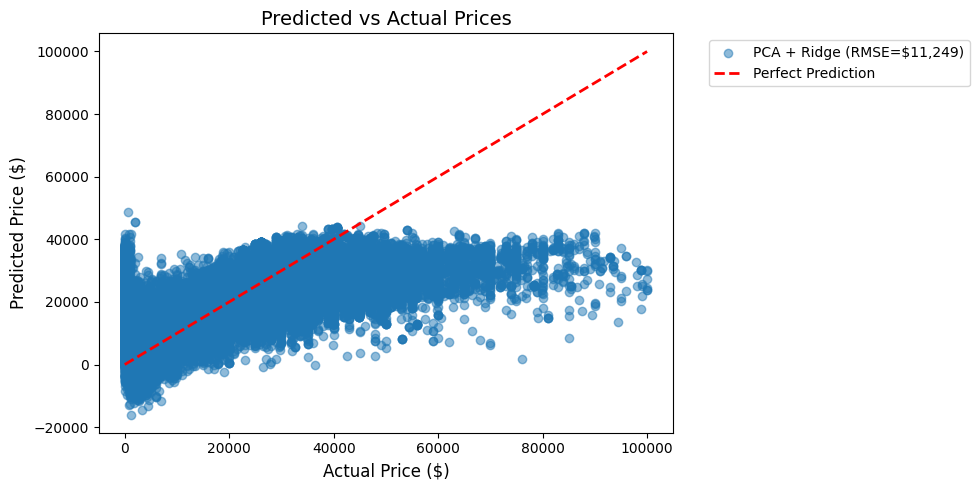

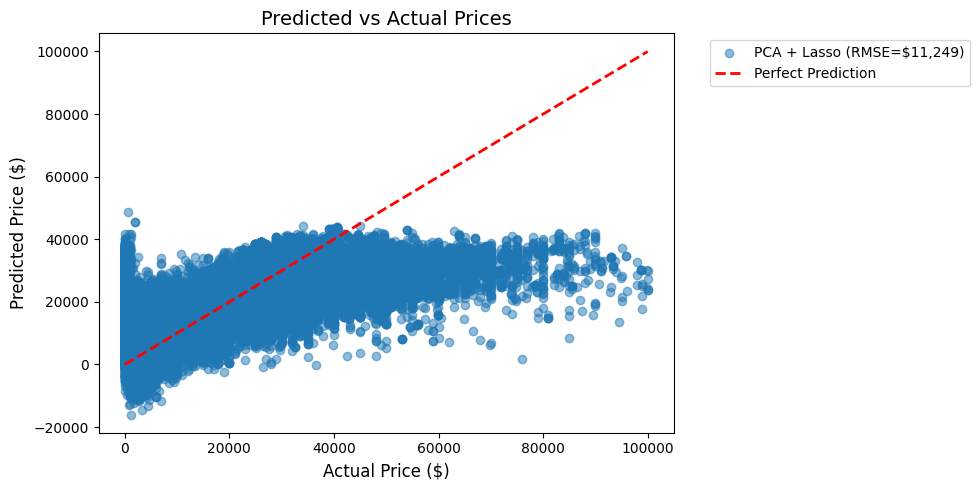

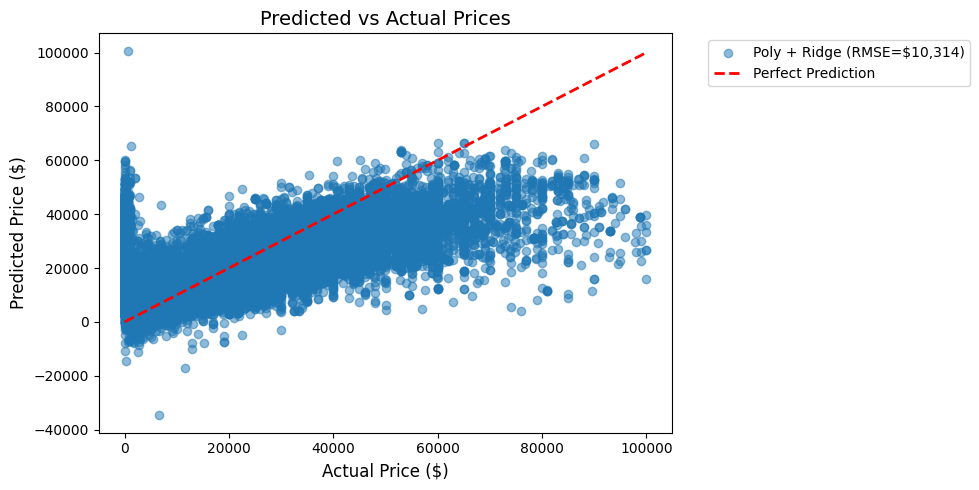


- Model Performance Summary -


Linear:
RMSE: $10,878.39
MAE: $7,325.63

Ridge:
RMSE: $10,878.32
MAE: $7,325.72

Lasso:
RMSE: $10,878.38
MAE: $7,325.63

PCA + Ridge:
RMSE: $11,248.95
MAE: $7,632.91

PCA + Lasso:
RMSE: $11,248.97
MAE: $7,633.00

Poly + Ridge:
RMSE: $10,313.99
MAE: $6,642.67

Best performing model (lowest RMSE): Poly + Ridge
RMSE: $10,313.99
MAE: $6,642.67


In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_models(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define models with pipelines
    models = {
        "Linear": make_pipeline(
            StandardScaler(),
            LinearRegression()
        ),
        "Ridge": make_pipeline(
            StandardScaler(),
            Ridge(alpha=148.49682622544634)
        ),
        "Lasso": make_pipeline(
            StandardScaler(),
            Lasso(alpha=0.1, max_iter=10000)
        ),
        "PCA + Ridge": make_pipeline(
            StandardScaler(),
            PCA(n_components=0.95),
            Ridge(alpha=148.49682622544634)
        ),
        "PCA + Lasso": make_pipeline(
            StandardScaler(),
            PCA(n_components=0.95),
            Lasso(alpha=0.1, max_iter=10000)
        ),
        "Poly + Ridge": make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=2, include_bias=False),
            Ridge(alpha=148.49682622544634)
        ),
        ### Commented out as it takes too long to run
        # "Poly + Lasso": make_pipeline(
        #     StandardScaler(),
        #     PolynomialFeatures(degree=2, include_bias=False),
        #     Lasso(alpha=0.1, max_iter=10000)
        # )
    }
    
    # Train and evaluate each model
    results = {}
    predictions = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[name] = y_pred
        
        results[name] = {
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred)
        }
    
    # Visualization 1: RMSE Comparison
    plt.figure(figsize=(12, 6))
    model_names = list(results.keys())
    rmse_scores = [results[model]['RMSE'] for model in model_names]
    
    colors = sns.color_palette("husl", len(model_names))
    bars = plt.bar(model_names, rmse_scores, color=colors)
    plt.title('Model Performance Comparison (RMSE)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('RMSE ($)', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

    # Visualization 2: MAE Comparison
    plt.figure(figsize=(12, 6))
    mae_scores = [results[model]['MAE'] for model in model_names]
    bars = plt.bar(model_names, mae_scores, color=colors)
    plt.title('Model Performance Comparison (MAE)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('MAE ($)', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

    # Visualization 3: Predicted vs Actual Prices
    for name, y_pred in predictions.items():
        plt.figure(figsize=(10, 5))
        plt.scatter(y_test, y_pred, alpha=0.5, label=f'{name} (RMSE=${results[name]["RMSE"]:,.0f})')
            # Add perfect prediction line
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')

        plt.xlabel('Actual Price ($)', fontsize=12)
        plt.ylabel('Predicted Price ($)', fontsize=12)
        plt.title('Predicted vs Actual Prices', fontsize=14)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


    return results, models

# Train and evaluate models
print("Training and evaluating models...")
results, trained_models = train_and_evaluate_models(X, y)

# Print results summary
print("\n- Model Performance Summary -\n")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"RMSE: ${metrics['RMSE']:,.2f}")
    print(f"MAE: ${metrics['MAE']:,.2f}")

# Identify best model based on RMSE
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
print(f"\nBest performing model (lowest RMSE): {best_model}")
print(f"RMSE: ${results[best_model]['RMSE']:,.2f}")
print(f"MAE: ${results[best_model]['MAE']:,.2f}")

best_trained_model = trained_models[best_model]


In [77]:
best_trained_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=148.49682622544634))])

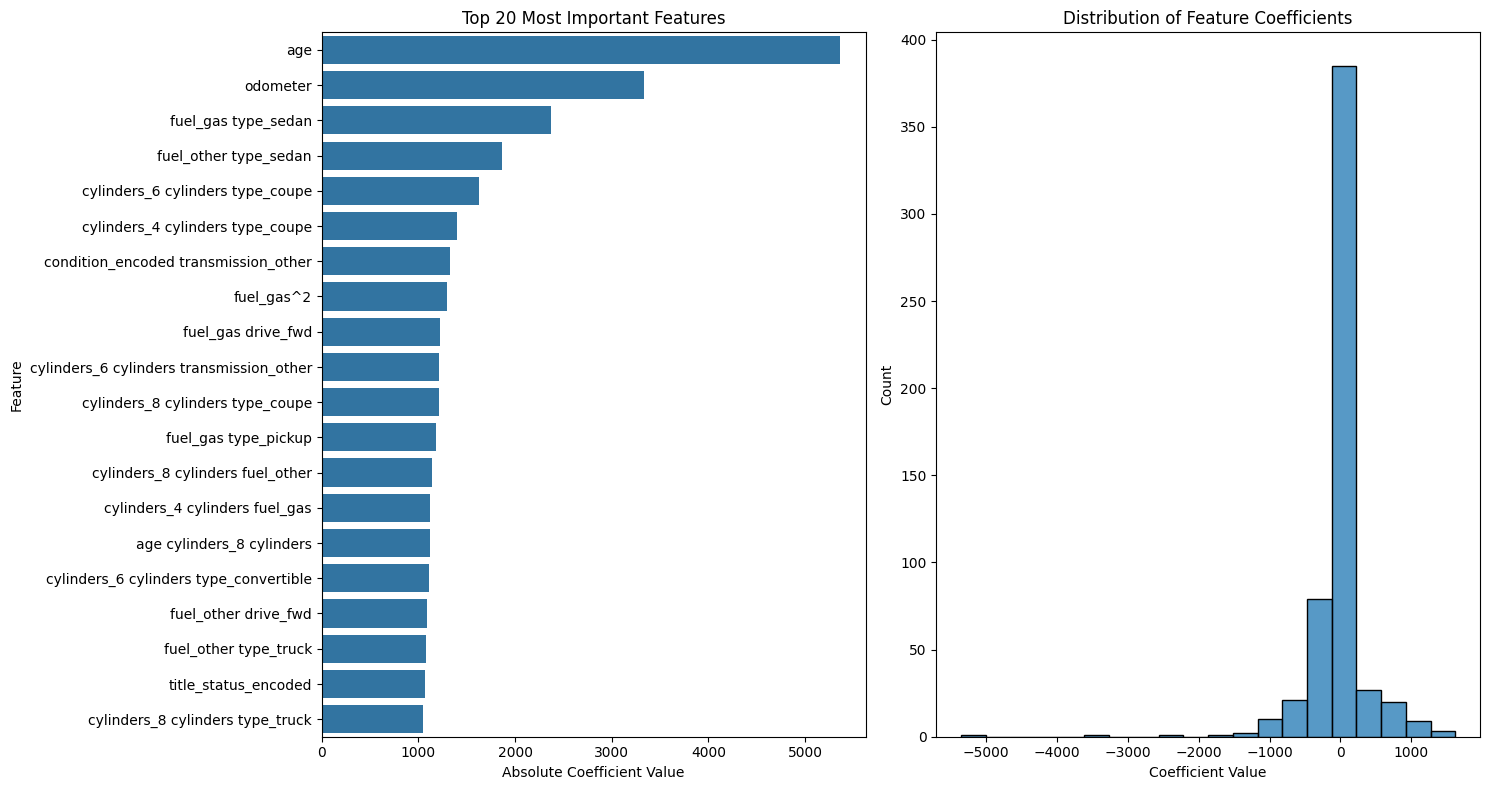

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_poly_ridge_model(best_trained_model, feature_names):
    poly_features = best_trained_model.named_steps['polynomialfeatures']
    poly_feature_names = poly_features.get_feature_names_out(feature_names)
    coefficients = best_trained_model.named_steps['ridge'].coef_
    
    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': poly_feature_names,
        'Coefficient': coefficients
    })
    
    # Sort by absolute coefficient value
    feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
    
    # 5. Visualize top features
    plt.figure(figsize=(15, 8))
    
    # Plot top 20 features
    top_n = 20
    plt.subplot(1, 2, 1)
    sns.barplot(data=feature_importance.head(top_n),
                x='Abs_Coefficient',
                y='Feature')
    plt.title(f'Top {top_n} Most Important Features')
    plt.xlabel('Absolute Coefficient Value')
    
    # Plot coefficient distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=feature_importance, x='Coefficient', bins=20)
    plt.title('Distribution of Feature Coefficients')
    plt.xlabel('Coefficient Value')
    
    plt.tight_layout()
    plt.show()

analyze_poly_ridge_model(trained_models[best_model], X.columns)

In [105]:
from sklearn.pipeline import Pipeline
scaled_ridge_model = Pipeline([
    ('josh_transform', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scale', StandardScaler()),
    ('josh_regression', Ridge())
])

parameters_to_try = {'josh_regression__alpha': [0.001, 1, 1000]}

from sklearn.model_selection import GridSearchCV

model_finder = GridSearchCV(estimator = scaled_ridge_model,
                               param_grid = parameters_to_try,
                               scoring = "neg_mean_squared_error",
                               cv = 5)

model_finder.fit(X_train, y_train)
model_finder.cv_results_

{'mean_fit_time': array([2.11526585, 2.23084879, 2.01722064]),
 'std_fit_time': array([0.06298248, 0.12202872, 0.01905925]),
 'mean_score_time': array([0.21634378, 0.22075315, 0.22005978]),
 'std_score_time': array([0.01320235, 0.00878144, 0.02471765]),
 'param_josh_regression__alpha': masked_array(data=[0.001, 1.0, 1000.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'params': [{'josh_regression__alpha': 0.001},
  {'josh_regression__alpha': 1},
  {'josh_regression__alpha': 1000}],
 'split0_test_score': array([-1.03713192e+08, -1.03814674e+08, -1.04041936e+08]),
 'split1_test_score': array([-2.03630665e+08, -1.04393744e+08, -1.04212788e+08]),
 'split2_test_score': array([-1.08380913e+08, -1.05299465e+08, -1.05537384e+08]),
 'split3_test_score': array([-1.05918990e+08, -1.06136880e+08, -1.06570735e+08]),
 'split4_test_score': array([-1.05969128e+08, -1.05428932e+08, -1.05661034e+08]),
 'mean_test_score': array([-1.25522578e+08, -1.05014739e+08, -1.05204775e+08]

##### Summary of the results

- Different Models are tried to determine the best model that can actually predict the price
- Traditional linear regression models, Ridge, Lasso were tried and all have nearly identical performance suggests minimal overfitting in the base features.
- PCA + Ridge, PCA + Lasso models are also trained and it performed slight worse than linear models. It might be because some information is lost in PCA.
- Polynomial + Lasso was run but had to stop as it is taking lot of memory.
- Polynomial + Ridge was the best performing model suggesting non-linear relationship in data


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Business Goal Achievement
- Original objective: What factors contribute to increase or decrease in the car prices.
- Results: The are a combination of factors that can influence the price. The top factors contributing to the price increase age(or year), mileage, manufacturer, condition as top factors


Model Performance Assessment
- Best Model: Polynomial + Ridge Regression
- RMSE: $10,313.99 (average prediction error)
- MAE: $6,642.67 (average absolute error)

Strengths:
- Good at predicting prices for common vehicles
- Captures non-linear relationships in pricing

Weakness:
- Not all features are contributing to the increase in the price
- Less accurate for high end or luxury cars.
- Some cars are listed in multiple regions, as regions are contributing less, we can drop region and dedup the vehicles which have the same VIN.
- Odometers less than 300K miles are considered
- Lot of data is missing or invalid. Have to do some simple imputing and drop certain outliers. So, the results are littled skewed to the data between 25-75% percentile.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

##### Business Deployment Overview: 
- After modeling and evaluating various algorithms, we are now deploying a predictive solution aimed at improving pricing accuracy and guiding used vehicle inventory decisions.
- The project is to analyze 460000 vehicle records and buld a predictive model to explain what drives the car value.
- The data set is not clean and there are missing or invalid outliers but was able to determine the key factors contributing to the price
    -   Vehicle Age (Year): This is the single most important factor. Newer cars command significantly higher prices. The value depreciates most steeply in the first few years.
    - Mileage (Odometer): Lower mileage is strongly associated with higher prices.
    - Manufacturer: Premium brands (e.g., Lexus, BMW) hold their value better than standard brands, even when age and mileage are similar.
    - Vehicle Condition: While we had limited data on this, vehicles listed in "excellent" or "like-new" condition fetch higher prices. 
    - Paint: Preferred color of the used cars are black, white and red. 
    - The model suggests the price and based on other factors (geo political, region), it must be adjusted. The model has an error of ~$6600 error.
    - When we analyzed the factors contributing to the used car price in the application, we observed the following order of importance:
        - Age (How old the car is)
        - Odometer
        - fuel Gas type 
        - fuel other type sedan
        - cylinder types coupe 6 and 4
        - gas type pickup trucks
